In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parameters
W = 800e-6  #  (m)
L = 0.05  #  (m)
p0 = 140  # (Pa)
pL = 100  
pressure_gradient = (p0 - pL) / L 
viscosity_phase1 = 0.2  #  (Pa.s)
viscosity_phase2 = 0.1  #  (Pa.s)
grid_points = 1000 

In [3]:
# Grid setup
z = np.linspace(0, W, grid_points)  
u = np.zeros_like(z)  

In [4]:
for i, zi in enumerate(z):
    if zi <= W / 3:  
        mu = viscosity_phase1
        C1 = - (pressure_gradient/2) * W
        u[i] = - (pressure_gradient / (2 * mu)) * zi**2 - (C1/mu) * zi

    elif W / 3 < zi <= 2 * W / 3:  
        mu1 = viscosity_phase1
        mu2 = viscosity_phase2
        C1 = - (pressure_gradient/2) * W
        C2 = (1/mu2 - 1/mu1) * ((pressure_gradient/2) * (W/3)**2 + C1 * (W/3))
        u[i] = - (pressure_gradient / 2/mu2) * (zi**2) - (C1/mu2) * zi + C2

    else:  
        mu = viscosity_phase1
        C1 = - (pressure_gradient/2) * W
        u[i] = - (pressure_gradient / (2 * mu)) * zi**2 -(C1/mu) * zi


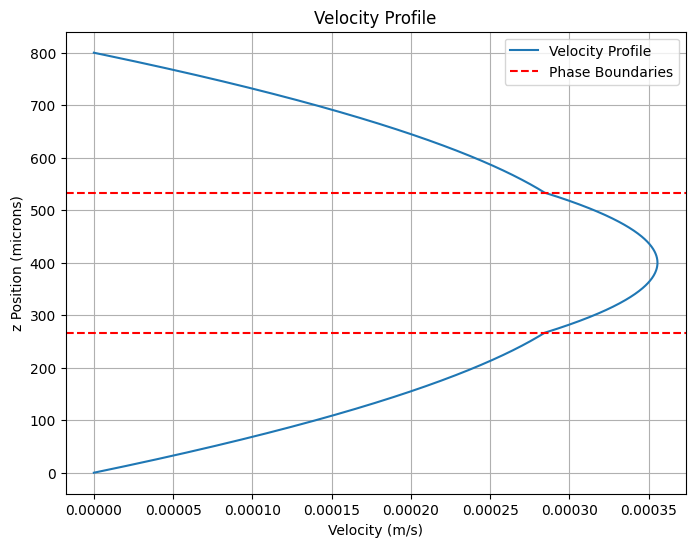

In [5]:
plt.figure(figsize=(8, 6))
plt.plot(u, z * 1e6, label="Velocity Profile")
plt.axhline(W / 3 * 1e6, color='r', linestyle='--', label="Phase Boundaries")
plt.axhline(2 * W / 3 * 1e6, color='r', linestyle='--')
plt.title("Velocity Profile")
plt.xlabel("Velocity (m/s)")
plt.ylabel("z Position (microns)")
plt.legend()
plt.grid()
plt.show()



In [6]:
velocity_gradient = np.gradient(u, z)
stress = np.zeros_like(velocity_gradient)  


In [7]:
for i, zi in enumerate(z):
    if zi <= W / 3:  
        mu = viscosity_phase1
    elif W / 3 < zi <= 2 * W / 3:  
        mu = viscosity_phase2
    else:  
        mu = viscosity_phase1
    stress[i] = -mu * velocity_gradient[i]  

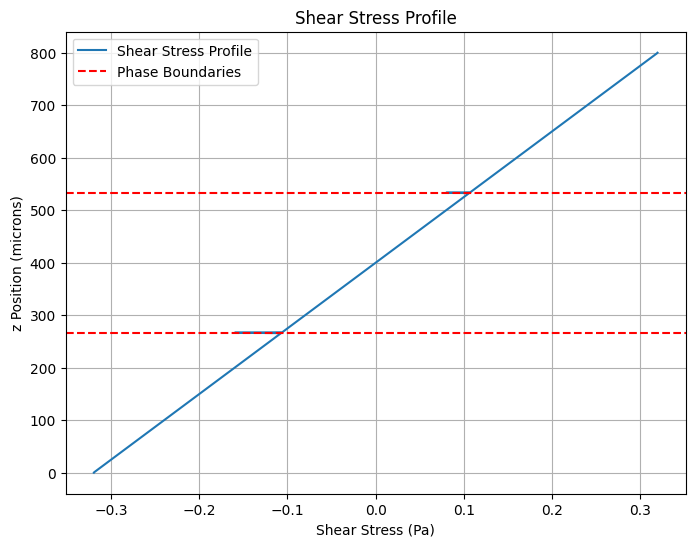

In [8]:

plt.figure(figsize=(8, 6))
plt.plot(stress, z * 1e6, label="Shear Stress Profile")
plt.axhline(W / 3 * 1e6, color='r', linestyle='--', label="Phase Boundaries")
plt.axhline(2 * W / 3 * 1e6, color='r', linestyle='--')
plt.title("Shear Stress Profile")
plt.xlabel("Shear Stress (Pa)")
plt.ylabel("z Position (microns)")
plt.legend()
plt.grid()
plt.show()